In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
from goexplore import *

In [4]:
import glob

In [9]:
env_id2archives = defaultdict(list)

In [10]:
for f in tqdm(glob.glob('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/ge_specialist/*')):
    archive = np.load(f, allow_pickle=True).item()
    env_id = archive['config']['env_id']
    env_id2archives[env_id].append(archive)

  0%|          | 0/11200 [00:00<?, ?it/s]

In [93]:
steps, steps_leaf, steps_best = 0, 0, 0
for env_id, archives in tqdm(env_id2archives.items()):
    for archive in archives[:40]:
        trajs = archive['traj']
        is_leaf = archive['is_leaf']
        rets = archive['ret']
        steps += np.sum([traj.size for traj in trajs])
        steps_leaf += np.sum([traj.size for traj in trajs[is_leaf]])
        steps_best += np.sum([traj.size for traj in trajs[[rets.argmax()]]])
print(steps/1e9, steps_leaf/1e9, steps_best/1e9)

  0%|          | 0/56 [00:00<?, ?it/s]

10.631867215 1.029152707 0.002219739


In [13]:
with open("./atari_games_57.txt") as f:
    env_ids = f.read().split("\n")
with open("./atari_games_ignore.txt") as f:
    env_ids_ignore = f.read().split("\n")
env_ids = np.array([env_id for env_id in env_ids if env_id not in env_ids_ignore])
env_ids = env_ids

In [21]:
env_id2env = {}
for env_id in tqdm(env_ids[:48]):
    env = envpool.make_gymnasium(f'{env_id}-v5', num_envs=64, img_height=84, img_width=84, full_action_space=True)
    env_id2env[env_id] = env

  0%|          | 0/48 [00:00<?, ?it/s]

In [86]:
for env_id in tqdm(env_ids[:48]):
    env = env_id2env[env_id]
    # env.reset()
    for t in tqdm(range(1024)):
        env.step(np.random.randint(0, 18, size=(64,)))

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [74]:
env_ids

array(['Alien', 'Amidar', 'Assault', 'Asterix', 'Asteroids', 'Atlantis',
       'BankHeist', 'BattleZone', 'BeamRider', 'Berzerk', 'Bowling',
       'Boxing', 'Breakout', 'Centipede', 'ChopperCommand',
       'CrazyClimber', 'Defender', 'DemonAttack', 'DoubleDunk', 'Enduro',
       'FishingDerby', 'Freeway', 'Frostbite', 'Gopher', 'Gravitar',
       'Hero', 'IceHockey', 'Jamesbond', 'Kangaroo', 'Krull',
       'KungFuMaster', 'MontezumaRevenge', 'MsPacman', 'NameThisGame',
       'Phoenix', 'Pitfall', 'Pong', 'PrivateEye', 'Qbert', 'Riverraid',
       'RoadRunner', 'Robotank', 'Seaquest', 'Solaris', 'SpaceInvaders',
       'StarGunner', 'Surround', 'Tennis', 'TimePilot', 'Tutankham',
       'UpNDown', 'Venture', 'VideoPinball', 'WizardOfWor', 'YarsRevenge',
       'Zaxxon'], dtype='<U16')

In [87]:
for env_id in tqdm(env_ids[:48]):
    n_envs = 64
    n_steps = 1024
    # env_id = "YarsRevenge"

    env = envpool.make_gymnasium(
        f"{env_id}-v5", num_envs=n_envs, img_height=84, img_width=84, gray_scale=True, stack_num=1, frame_skip=4, repeat_action_probability=0.0, noop_max=1, use_fire_reset=False, full_action_space=True
    )
    start = time.time()
    env.reset()
    for t in tqdm(range(n_steps)):
        action = np.random.randint(18, size=n_envs)
        _ = env.step(action)
    end = time.time()
    # print(f"envpool: ")
    # print(f"Time: {end - start:.2f}s")
    # print(f"FPS: {n_steps * n_envs / (end - start):.2f}")
    # print()


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
56*200

11200

In [ ]:
64*2048 envs*steps
48 envs_ids
84*84 obs size
= 50 gb ram

In [50]:
6.3e6/384/64

256.34765625

In [51]:
512

512

In [ ]:
17 min collection
4 min training

In [136]:
a1 = np.load('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/ge_specialist/ge_specialist_Alien_0000.npy', allow_pickle=True).item()
a1 = a1['traj']

In [137]:
a2 = np.load('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/goexplore/Alien_0000.npy', allow_pickle=True).item()
a2 = a2['trajs']

In [138]:
for i, j in tqdm(zip(a1, a2)):
    assert np.array_equal(i, j)

0it [00:00, ?it/s]

AssertionError: 

In [100]:
fs1 = glob.glob('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/ge_specialist/*')
fs2 = glob.glob('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/goexplore/*')
fs1 = sorted(fs1)
fs2 = sorted(fs2)

In [102]:
fs1[0], fs2[0]

('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/ge_specialist/ge_specialist_Alien_0000.npy',
 '/data/vision/phillipi/akumar01/exploration-generalization/atari/data/goexplore/Alien_0000.npy')

In [132]:
for f1, f2 in zip(fs1, fs2):
    a1 = np.load(f1, allow_pickle=True).item()
    a2 = np.load(f2, allow_pickle=True).item()
    a1 = a1['traj']
    a2 = a2['trajs']
    break

In [131]:
f1, f2

('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/ge_specialist/ge_specialist_Alien_0000.npy',
 '/data/vision/phillipi/akumar01/exploration-generalization/atari/data/goexplore/Alien_0000.npy')

In [133]:
for ti1, ti2 in tqdm(zip(a1, a2)):
    assert np.array_equal(ti1, ti2)

0it [00:00, ?it/s]

AssertionError: 

In [125]:
len(t1), len(t2)

(47581, 47536)

In [119]:
ti1

array([ 0,  0,  3,  4, 12,  6, 14,  5,  8, 16, 15,  3, 14,  1,  0,  3,  2,
        4,  6, 17,  9,  1,  9,  6, 14,  0, 12, 11,  4,  3,  8,  3, 15, 16,
        9,  5, 17,  2,  3, 13,  9, 10,  2,  3,  3,  3, 14,  1, 11,  2,  0,
        6, 10,  8,  2,  2, 16,  8,  3, 14,  3, 13, 11, 14,  1,  4,  6, 13,
       15,  8, 11,  1, 12,  3,  3,  6,  5,  0, 10,  5, 15, 14,  3,  9,  3,
       12,  9, 13,  2, 12,  2,  7, 17, 11,  9,  9,  0, 11,  0, 16,  3, 14,
        8, 13,  0,  4, 10,  4,  7, 13,  8, 11, 13, 14,  3,  2, 11, 13,  6,
       16, 16,  3, 10, 13,  6, 13, 16, 15,  3,  7,  2, 13,  4, 17,  1,  1,
        7,  9,  4, 16, 10,  4, 16, 13, 11,  6, 15, 12, 10, 11,  4, 17,  4,
        6,  8,  4, 13,  5,  8,  7, 12,  7,  0, 11,  7,  8,  0,  6,  2,  0,
       14,  6,  3, 15,  6, 17, 12, 11, 14, 13,  8,  4,  2, 11, 15, 13, 14,
       13, 10,  4,  9, 12,  8, 14,  5, 11, 17,  8,  0, 16, 12, 11, 17, 12,
        7,  3,  9, 11, 16,  7, 11, 12,  8, 10, 11, 14, 11,  5, 15,  3,  2,
        6, 17,  3,  5,  7

In [120]:
ti2

array([ 0,  0,  3,  4, 12,  6, 14,  5,  8, 16, 15,  3, 14,  1,  0,  3,  2,
        4,  6, 17,  9,  1,  9,  6, 14,  0, 12, 11,  4,  3,  8,  3, 15, 16,
        9,  5, 17,  2,  3, 13,  9, 10,  2,  3,  3,  3, 14,  1, 11,  2,  0,
        6, 10,  8,  2,  2, 16,  8,  3, 14,  3, 13, 11, 14,  1,  4,  6, 13,
       15,  8, 11,  1, 12,  3,  3,  6,  5,  0, 10,  5, 15, 14,  3,  9,  3,
       12,  9, 13,  2, 12,  2,  7, 17, 11,  9,  9,  0, 11,  0, 16,  3, 14,
        8, 13,  0,  4, 10,  4,  7, 13,  8, 11, 13, 14,  3,  2, 11, 13,  6,
       16, 16,  3, 10, 13,  6, 13, 16, 15,  3,  7,  2, 13,  4, 17,  1,  1,
        7,  9,  4, 16, 10,  4, 16, 13, 11,  6, 15, 12, 10, 11,  4, 17,  4,
        6,  8,  4, 13,  5,  8,  7, 12,  7,  0, 11,  7,  8,  0,  6,  2,  0,
       14,  6,  3, 15,  6, 17, 12, 11, 14, 13,  8,  4,  2, 11, 15, 13, 14,
       13, 10,  4,  9, 12,  8, 14,  5, 11, 17,  8,  0, 16, 12, 11, 17, 12,
        7,  3,  9, 11, 16,  7, 11, 12,  8, 10, 11, 14, 11,  5, 15,  3,  2,
        6, 13,  3, 13,  6

In [90]:
from goexplore_train import *

In [79]:
args = parse_args('--track=True --project="ge_generalist" --name="ge_generalist_best_0_0000" --device="cuda" --env_ids StarGunner NameThisGame RoadRunner IceHockey Boxing Assault MsPacman Solaris Surround KungFuMaster Asteroids Bowling Kangaroo Frostbite MontezumaRevenge Tutankham PrivateEye BattleZone ChopperCommand Jamesbond Pitfall UpNDown DoubleDunk VideoPinball Phoenix CrazyClimber Atlantis Krull Defender YarsRevenge FishingDerby TimePilot BeamRider Centipede Hero DemonAttack Robotank Zaxxon Qbert Amidar Breakout Seaquest Gravitar BankHeist Gopher Pong Freeway Enduro --strategy="best" --n_iters=1500 --save_agent="./data/ge_generalist/ge_generalist_best_0_0000.pt" --ge_data_dir="./data/ge_specialist/" --n_archives=40 --i_split=0'.split(" "))

for k, v in vars(args).items():
    if isinstance(v, str):
        if v.startswith('"') and v.endswith('"'):
            v = v.replace('"', '')
            setattr(args, k, v)

In [80]:
args

Namespace(track=True, entity=None, project='ge_generalist', name='ge_generalist_best_0_0000', device='cuda', seed=0, env_ids=['StarGunner', 'NameThisGame', 'RoadRunner', 'IceHockey', 'Boxing', 'Assault', 'MsPacman', 'Solaris', 'Surround', 'KungFuMaster', 'Asteroids', 'Bowling', 'Kangaroo', 'Frostbite', 'MontezumaRevenge', 'Tutankham', 'PrivateEye', 'BattleZone', 'ChopperCommand', 'Jamesbond', 'Pitfall', 'UpNDown', 'DoubleDunk', 'VideoPinball', 'Phoenix', 'CrazyClimber', 'Atlantis', 'Krull', 'Defender', 'YarsRevenge', 'FishingDerby', 'TimePilot', 'BeamRider', 'Centipede', 'Hero', 'DemonAttack', 'Robotank', 'Zaxxon', 'Qbert', 'Amidar', 'Breakout', 'Seaquest', 'Gravitar', 'BankHeist', 'Gopher', 'Pong', 'Freeway', 'Enduro'], strategy='best', n_iters=1500, n_envs=4, n_steps=512, batch_size=384, n_updates=32, ctx_len=64, save_agent='./data/ge_generalist/ge_generalist_best_0_0000.pt', lr=0.0001, ge_data_dir='./data/ge_specialist/', n_archives=40, n_envs_per_id=0, i_split='0')

In [107]:
def load_env_id2archives(args):
    env_id2archives = {}
    for env_id in tqdm(args.env_ids):
        files = sorted(glob.glob(f"{args.ge_data_dir}/*{env_id}*"))
        files = files[: args.n_archives]
        
        env_id2archives[env_id] = [np.load(f, allow_pickle=True).item() for f in files]
    return env_id2archives


def get_env_id2trajs(env_id2archives, strategy="best"):
    env_id2trajs = {}
    for env_id, archives in tqdm(env_id2archives.items()):
        env_id2trajs[env_id] = []
        for archive in archives:
            trajs, rets, novelty, is_leaf = archive["traj"], archive["ret"], archive["novelty"], archive["is_leaf"]
            if strategy == "all":
                idx = np.arange(len(trajs))
            elif strategy == "best":
                idx = np.array([np.argmax(rets)])
            elif strategy == "leaf":
                idx = np.nonzero(is_leaf)[0]
            else:
                raise ValueError(f"Unknown strategy: {strategy}")
            trajs = trajs[idx]
            env_id2trajs[env_id].extend(trajs)
    return env_id2trajs

print("Loading archives")
env_id2archives = load_env_id2archives(args)


Loading archives


  0%|          | 0/48 [00:00<?, ?it/s]

In [82]:
def sample_traj_fn(id):
    env_id = args.env_ids[id // args.n_envs]
    trajs = env_id2trajs[env_id]
    return trajs[np.random.choice(len(trajs))]

In [109]:
args.strategy = 'best'

In [110]:
print("Creating trajs")
env_id2trajs = get_env_id2trajs(env_id2archives, strategy=args.strategy)
for env_id, trajs in env_id2trajs.items():
    print(f"env_id: {env_id}, #trajs: {len(trajs)}")

Creating trajs


  0%|          | 0/48 [00:00<?, ?it/s]

env_id: StarGunner, #trajs: 40
env_id: NameThisGame, #trajs: 40
env_id: RoadRunner, #trajs: 40
env_id: IceHockey, #trajs: 40
env_id: Boxing, #trajs: 40
env_id: Assault, #trajs: 40
env_id: MsPacman, #trajs: 40
env_id: Solaris, #trajs: 40
env_id: Surround, #trajs: 40
env_id: KungFuMaster, #trajs: 40
env_id: Asteroids, #trajs: 40
env_id: Bowling, #trajs: 40
env_id: Kangaroo, #trajs: 40
env_id: Frostbite, #trajs: 40
env_id: MontezumaRevenge, #trajs: 40
env_id: Tutankham, #trajs: 40
env_id: PrivateEye, #trajs: 40
env_id: BattleZone, #trajs: 40
env_id: ChopperCommand, #trajs: 40
env_id: Jamesbond, #trajs: 40
env_id: Pitfall, #trajs: 40
env_id: UpNDown, #trajs: 40
env_id: DoubleDunk, #trajs: 40
env_id: VideoPinball, #trajs: 40
env_id: Phoenix, #trajs: 40
env_id: CrazyClimber, #trajs: 40
env_id: Atlantis, #trajs: 40
env_id: Krull, #trajs: 40
env_id: Defender, #trajs: 40
env_id: YarsRevenge, #trajs: 40
env_id: FishingDerby, #trajs: 40
env_id: TimePilot, #trajs: 40
env_id: BeamRider, #trajs: 40


In [111]:
print("Creating envs")
make_env_fns = []
for env_id in args.env_ids:
    make_env_fns.extend([partial(make_ge_env_single, env_id=env_id) for _ in range(args.n_envs)])
env = MyAsyncVectorEnv(make_env_fns)
print("Done creating envs!")

Creating envs
Done creating envs!


Process Worker<MyAsyncVectorEnv>-83:
Process Worker<MyAsyncVectorEnv>-55:
Process Worker<MyAsyncVectorEnv>-160:
Process Worker<MyAsyncVectorEnv>-3:
Process Worker<MyAsyncVectorEnv>-156:
Process Worker<MyAsyncVectorEnv>-141:
Process Worker<MyAsyncVectorEnv>-107:
Process Worker<MyAsyncVectorEnv>-125:
Process Worker<MyAsyncVectorEnv>-121:
Process Worker<MyAsyncVectorEnv>-41:
Process Worker<MyAsyncVectorEnv>-130:
Process Worker<MyAsyncVectorEnv>-81:
Process Worker<MyAsyncVectorEnv>-109:
Process Worker<MyAsyncVectorEnv>-175:
Process Worker<MyAsyncVectorEnv>-25:
Process Worker<MyAsyncVectorEnv>-80:
Process Worker<MyAsyncVectorEnv>-21:
Process Worker<MyAsyncVectorEnv>-47:
Process Worker<MyAsyncVectorEnv>-30:
Process Worker<MyAsyncVectorEnv>-29:
Process Worker<MyAsyncVectorEnv>-84:
Process Worker<MyAsyncVectorEnv>-174:
Process Worker<MyAsyncVectorEnv>-176:
Process Worker<MyAsyncVectorEnv>-113:
Process Worker<MyAsyncVectorEnv>-1:
Process Worker<MyAsyncVectorEnv>-178:
Process Worker<MyAsyncVecto

In [112]:
print("Creating buffer")
buf = GEBuffer(env, args.n_steps, sample_traj_fn=sample_traj_fn, device=args.device)

Creating buffer


In [113]:
from tqdm.auto import tqdm
buf.gecollect(pbar=tqdm(total=args.n_steps))

  0%|          | 0/512 [00:00<?, ?it/s]

resetting  [ 29  30  31  32  33  34  35  80  81  82  83 120 121 123 184 185 186 187]
resetting  [ 29  30  31  32  33  34  35  80  81  82  83 120 184 185 186 187]
resetting  [ 31  32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 31  32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 32  33  34  35  80  81  82  83 184 185 186 187]
resetting  [ 33  34  35  80  81  82  

KeyboardInterrupt: 

In [116]:
buf.trajs[80]

array([0], dtype=uint8)

In [118]:
80//4

20

In [126]:
list(env_id2trajs.keys())[33//4]

'Surround'

In [ ]:
# 3 min for best

In [ ]:
# 45 sec for leaf

In [52]:
tlens = []
for env_id, trajs in env_id2trajs.items():
    tlens.extend([len(traj) for traj in trajs])

In [48]:
np.min(tlens), np.median(tlens), np.mean(tlens), np.max(tlens)

(1, 712.0, 1057.5255102040817, 5772)

In [53]:
np.min(tlens), np.median(tlens), np.mean(tlens), np.max(tlens)

(2, 471.0, 589.9723805833495, 5913)

In [138]:
with open('./atari_games_104.txt') as f:
    a = f.read().split('\n')
with open('./atari_games_57.txt') as f:
    b = f.read().split('\n')
a = [i for i in a if i not in b]

In [139]:
a

['Adventure',
 'AirRaid',
 'Atlantis2',
 'Backgammon',
 'BasicMath',
 'Blackjack',
 'Carnival',
 'Casino',
 'Crossbow',
 'Darkchambers',
 'DonkeyKong',
 'Earthworld',
 'ElevatorAction',
 'Entombed',
 'Et',
 'FlagCapture',
 'Frogger',
 'Galaxian',
 'Hangman',
 'HauntedHouse',
 'HumanCannonball',
 'JourneyEscape',
 'Kaboom',
 'KeystoneKapers',
 'KingKong',
 'Klax',
 'Koolaid',
 'LaserGates',
 'LostLuggage',
 'MarioBros',
 'MiniatureGolf',
 'MrDo',
 'Othello',
 'Pacman',
 'Pitfall2',
 'Pooyan',
 'SirLancelot',
 'SpaceWar',
 'Superman',
 'Tetris',
 'TicTacToe3d',
 'Trondead',
 'Turmoil',
 'VideoCheckers',
 'VideoChess',
 'VideoCube',
 'WordZapper']

In [19]:
import wandb
import matplotlib.pyplot as plt

In [20]:
import wandb
api = wandb.Api()

In [21]:
for run in api.runs('akumar01-mit/ge_generalist'):
    if not run.config['strategy'] == 'best':
        continue

In [22]:
df =run.history(samples=50000)

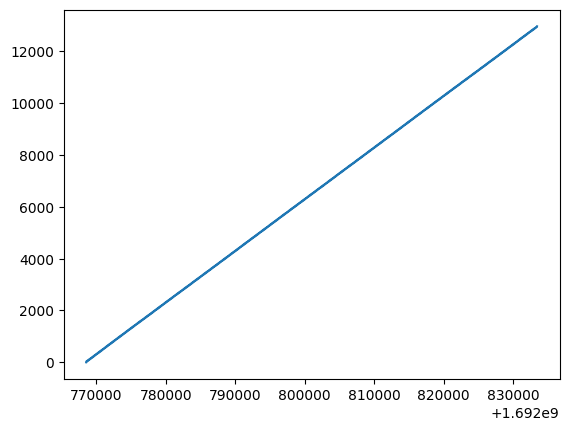

In [28]:
plt.plot(df._timestamp, df._step)